**Author**: *Theodoros Mastromanolis* (tmast@csd.auth.gr) (AM: 177)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Map the categories to numbers and import the dataset

In [78]:
import os
from PIL import Image

folders = {
    "rock": "/content/gdrive/MyDrive/Colab Notebooks/data/rock-paper-scissors-data/rock",
    "scissors": "/content/gdrive/MyDrive/Colab Notebooks/data/rock-paper-scissors-data/scissors",
    "paper": "/content/gdrive/MyDrive/Colab Notebooks/data/rock-paper-scissors-data/paper"
}

category_map = {"rock": 0, "scissors": 1, "paper": 2}
images = []
labels = []

for category, folder in folders.items():
    for file in os.listdir(folder):
        img_path = os.path.join(folder, file)
        with Image.open(img_path) as img:
            img = img.resize((128, 128))
            img = np.array(img)
            images.append(img)
            labels.append(category_map[category])

images = np.array(images)
labels = np.array(labels)

# Split the dataset to train and test set

In [79]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, stratify=labels)

# Train the model

In [80]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
55/55 [==============================] - 3s 23ms/step - loss: 69.7369 - accuracy: 0.7109 - val_loss: 0.4082 - val_accuracy: 0.8584
Epoch 2/10
55/55 [==============================] - 1s 18ms/step - loss: 0.1404 - accuracy: 0.9531 - val_loss: 0.2467 - val_accuracy: 0.9110
Epoch 3/10
55/55 [==============================] - 1s 18ms/step - loss: 0.0299 - accuracy: 0.9914 - val_loss: 0.2004 - val_accuracy: 0.9475
Epoch 4/10
55/55 [==============================] - 1s 17ms/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.1691 - val_accuracy: 0.9589
Epoch 5/10
55/55 [==============================] - 1s 17ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1822 - val_accuracy: 0.9612
Epoch 6/10
55/55 [==============================] - 1s 15ms/step - loss: 3.5356e-04 - accuracy: 1.0000 - val_loss: 0.2014 - val_accuracy: 0.9658
Epoch 7/10
55/55 [==============================] - 1s 17ms/step - loss: 2.0231e-04 - accuracy: 1.0000 - val_loss: 0.2081 - val_accuracy: 0.9635
Epoc

# Model summary

In [81]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 57600)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

# Test the model

In [82]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test set accuracy: {test_acc}")

14/14 [==============================] - 0s 6ms/step - loss: 0.2653 - accuracy: 0.9589
Test set accuracy: 0.9589040875434875


# Test a random image

In [83]:
import numpy as np
import random
import tensorflow as tf

random_index = random.randint(0, len(X_test) - 1)
random_image = X_test[random_index]
random_label = y_test[random_index]

random_image_processed = np.expand_dims(random_image, axis=0)

predictions = model.predict(random_image_processed)
predicted_category = np.argmax(predictions, axis=1)

categories = ['rock', 'scissors', 'paper']
print(f"Actual category: {categories[random_label]}")
print(f"Predicted category: {categories[predicted_category[0]]}")

1/1 [==============================] - 0s 62ms/step
Actual category: scissors
Predicted category: scissors


# Preprocess the random image and replicate the random agent behavior

In [84]:
import cv2
p1 = 0.5
p2  = 0.5

def preprocess_image(img):
    # Vertical rotation
    if random.random() < p1:
        img = cv2.flip(img, 0)

    # Horizontal rotation
    if random.random() < p2:
        img = cv2.flip(img, 1)

    # Add noise
    σ = 255 * 0.05
    gaussian_noise = np.random.normal(0, σ, img.shape)
    img = img + gaussian_noise
    img = np.clip(img, 0, 255)

    return img

# Then re-test the model

In [85]:
random_index = random.randint(0, len(X_test) - 1)
random_image = X_test[random_index]
random_label = y_test[random_index]

random_image_processed = np.expand_dims(preprocess_image(random_image), axis=0)

predictions = model.predict(random_image_processed)
predicted_category = np.argmax(predictions, axis=1)

categories = ['rock', 'scissors', 'paper']
print(f"Actual category: {categories[random_label]}")
print(f"Predicted category: {categories[predicted_category[0]]}")

1/1 [==============================] - 0s 61ms/step
Actual category: paper
Predicted category: paper


# Create an environment where the agent plays 100 rounds of this game

## Here we will also see how much money the agent earns

In [86]:
def choose_move(category):
    if category == 'rock':
      return 'paper'
    if category == 'paper':
      return 'scissors'
    if category == 'scissors':
      return 'rock'

In [107]:
rounds_won = 0
for i in range(100):
  random_index = random.randint(0, len(X_test) - 1)
  random_image = X_test[random_index]
  random_label = y_test[random_index]

  random_image_processed = np.expand_dims(preprocess_image(random_image), axis=0)

  predictions = model.predict(random_image_processed)
  predicted_category = np.argmax(predictions, axis=1)

  categories = ['rock', 'scissors', 'paper']
  actual_category = categories[random_label]
  predicted_category = categories[predicted_category[0]]

  move = choose_move(predicted_category);
  actual_move_that_should_be_played = choose_move(actual_category);

  if move == actual_move_that_should_be_played:
    rounds_won +=1 ;

1/1 [==============================] - 0s 25ms/step
Rounds won: 64


In [116]:
print(f"Rounds won: {rounds_won}")

Rounds won: 64


# Test internet images

## Load the images



In [113]:
from PIL import Image

image1_path = "/content/gdrive/MyDrive/Colab Notebooks/data/rock-paper-scissors-data/internet/image1.png"
image2_path = "/content/gdrive/MyDrive/Colab Notebooks/data/rock-paper-scissors-data/internet/image2.jpg"
image3_path = "/content/gdrive/MyDrive/Colab Notebooks/data/rock-paper-scissors-data/internet/image3.jpg"
image4_path = "/content/gdrive/MyDrive/Colab Notebooks/data/rock-paper-scissors-data/internet/image4.jpg"
image5_path = "/content/gdrive/MyDrive/Colab Notebooks/data/rock-paper-scissors-data/internet/image5.jpg"

image = Image.open(image3_path)

if image.mode == 'RGBA':
        image = image.convert('RGB')

image = np.array(image.resize((128, 128)))
image = image / 255.0

# Make predictions

In [114]:
image_batch = np.expand_dims(image, axis=0)
predictions = model.predict(image_batch)

predicted_class = np.argmax(predictions, axis=1)
print(predicted_class) # 0 is rock, 1 is scissors, 2 is paper

1/1 [==============================] - 0s 19ms/step
[2]


# Actual image

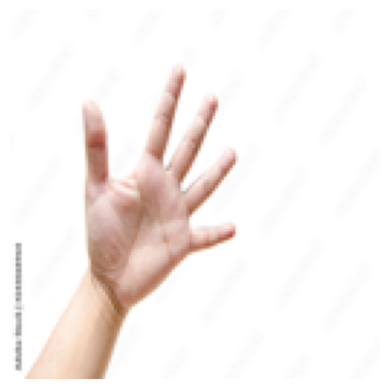

In [115]:
from matplotlib import pyplot as plt

plt.imshow(image)
plt.axis('off')
plt.show()